In [1]:
%matplotlib inline
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import ipywidgets as widgets
from ipywidgets import IntSlider, Output

In [4]:
range_1 = widgets.IntText(
    step = 0.1,
    description = "Нижняя граница диапазона",)

range_2 = widgets.IntText(
    step = 0.1,
    description = "Верхняя граница диапазона",)

Expected_Value = widgets.FloatText(
    step = 0.1,
    value = 0,
    description = "Математическое ожидание",)


Standart_Deviation = widgets.FloatText(
    value = 1,
    step = 0.1,
    description = "Среднеквадратичное отклонение",)

display(range_1, range_2, Expected_Value, Standart_Deviation)



IntText(value=0, description='Нижняя граница диапазона', step=0)

IntText(value=0, description='Верхняя граница диапазона', step=0)

FloatText(value=0.0, description='Математическое ожидание', step=0.1)

FloatText(value=1.0, description='Среднеквадратичное отклонение', step=0.1)

Вероятность обнаружения исследуемой характеристики в указанном диапазоне равна (поле допуска) составляет 0.975899970020191
24100.0 дефекта на миллион возможностей
Индекс воспроизводимости равен 0.83


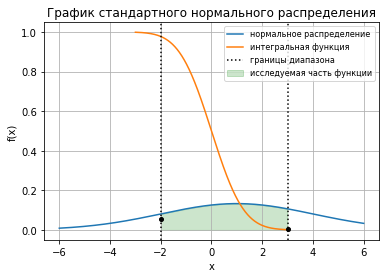

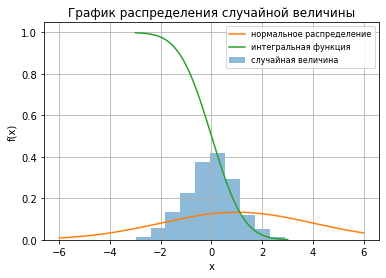

In [5]:
#        Модель для решения и графического отбражения вероятности 
#        обнаружения исследуемой характеристики в указанном диапазоне
#        и с заданными параметрами математического ожидания и средневадратичного отклонения

#Нижняя граница диапазона
range_1 = range_1.value
#Верхняя граница диапазона
range_2 = range_2.value
#Математическое ожидание
Expected_Value = Expected_Value.value  
#Среднеквадратическое отклонение
Standart_Deviation = Standart_Deviation.value     
x_axis = np.arange(-6, 6, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,Expected_Value, Standart_Deviation), label = 'нормальное распределение')
plt.grid(axis = 'both')

def Integral(x):
    i1 = quad((lambda x:math.exp((-(x * x))/(2))), x, np.inf)
    return i1[0]

def Normal_Distribution(x):
    y = (1/math.sqrt(math.pi * 2)) * Integral(x)
    return y

#доля генеральной совокупности, подчиняющейся нормальному распределению
quantum_of_total_combination = Normal_Distribution(range_1) - Normal_Distribution(range_2)
print("Вероятность обнаружения исследуемой характеристики в указанном диапазоне равна (поле допуска) составляет", quantum_of_total_combination)
quantum_of_defects = round(quantum_of_total_combination, 9)*1000000
print(round(1000000 - quantum_of_defects, 1), "дефекта на миллион возможностей")
index_of_reproducibility = (math.fabs(range_1) + math.fabs(range_2)) / 6
print("Индекс воспроизводимости равен", round(index_of_reproducibility,2))

a = -3
v = []
w = []
while (a < 3):
    a += 0.001
    v.append(a)
    y = Normal_Distribution(a)
    w.append(y)
plt.plot(v, w, label = 'интегральная функция')



px=np.arange(range_1,range_2,0.01)
plt.fill_between(px,norm.pdf(px,Expected_Value, Standart_Deviation),alpha=0.2, color='green', label = "исследуемая часть функции")
plt.axvline(range_1, 0, 1, color = "black", linestyle = ':')
plt.axvline(range_2, 0, 1, color = "black", linestyle = ':', label = "границы диапазона")
plt.xlabel('x')
plt.ylabel('f(x)')
xplot1 = plt.plot(range_1,norm.pdf(range_1), marker = "o", markersize=4, color="black")
xplot1 = plt.plot(range_2,norm.pdf(range_2), marker = "o", markersize=4, color="black")
#plt.hist(xs, bins=10, alpha=0.3, density=True, color = 'red')
plt.legend(fontsize = '8')
plt.title("График стандартного нормального распределения")

plt.show()

fig, ax = plt.subplots()
xs = norm.rvs(scale=1,size=1000)
ax.hist(xs, bins=10, alpha=0.5, density=True, label = 'случайная величина')
ax.plot(x_axis, norm.pdf(x_axis,Expected_Value, Standart_Deviation), label = 'нормальное распределение')
plt.plot(v, w, label = 'интегральная функция')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend(fontsize = '8')
ax.set_title("График распределения случайной величины")
ax.grid(True)